In [47]:
from mnist import MNIST
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
mndata = MNIST('C:\\Users\\Divya\\Google Drive\\Acads\\Courses-Winter2018\\CSE253-NeuralNetworks\\neuralnets253')
mndata.gz = True
images, labels = mndata.load_training() #Images is a list of 60000 images of 784 dimensions, Labels is a list of 60000 ints
testImages, testLabels = mndata.load_testing()

In [65]:
def addBiasToInput(imgs, tstImgs):
    imgs = np.array(imgs)
    tstImgs = np.array(tstImgs)
    imgs = np.insert(imgs, 0, 1, axis=1)
    tstImgs = np.insert(tstImgs, 0, 1, axis=1)
    return imgs, tstImgs
    
def roughZScoring(imgs, tstImgs):
    imgs = (imgs/127.5)-1.0
    tstImgs = (tstImgs/127.5)-1.0
    return imgs, tstImgs

def sigmoid(x):
    return 1/(1+np.exp(-1*x))

def derSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def labelsToVectForm(labels):
    vectForm = np.zeros((len(labels), labelNums))
    for i in range(len(labels)):
        vectForm[i][labels[i]] = 1
    return vectForm

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims = True)

def calculateOutput1Layer(x, W1, W2):
    A1 = x.dot(W1)
    Z1 = sigmoid(A1)
    X2 = np.insert(Z1, 0, 1, axis=1)
    A2 = X2.dot(W2)
    Y = softmax(A2)
    return Y

def calculateOutput2Layers(x, W1, W2, W3):
    A1 = x.dot(W1)
    Z1 = sigmoid(A1)
    X2 = np.insert(Z1, 0, 1, axis=1)
    A2 = X2.dot(W2)
    Z2 = sigmoid(A1)
    X3 = np.insert(Z2, 0, 1, axis=1)
    A3 = X3.dot(W3)
    Y = softmax(A3)
    return Y

def calculateCost(xLen, t, Y):
    return -(1/xLen)*(np.sum(np.multiply(t, np.log(Y))))

def calculateAccuracy(Y, labels):
    predClass = np.argmax(Y, axis=1)
    return accuracy_score(labels, predClass)

In [49]:
images, testImages = addBiasToInput(images, testImages)
images, testImages = roughZScoring(images, testImages)
testLabels = np.array(testLabels)
hiddenUnits = 64
inputDims = len(images[0])
miniBatchSize = 128
labelNums = 10

In [50]:
testLabels.shape

(10000,)

In [51]:
from sklearn.model_selection import train_test_split
trainImages, validImages, trainLabels, validLabels = train_test_split(images, labels, test_size=0.10)

In [52]:
t_train = labelsToVectForm(trainLabels)
t_test = labelsToVectForm(testLabels)
t_validation = labelsToVectForm(validLabels)
x = trainImages
t = t_train

In [63]:
epsilon = 0.001
learningRate = 0.5
batch_size = 128
batches = len(trainImages)//batch_size
learningRates = [0.5, 0.1, 0.01, 0.001, 0.0001] #[0.8, 0.5, 0.1]#, 0.01]
maxIters = 1000

------ Running for learning rate:  0.5 -------
Current validation cost:  0.482072006123
Current validation cost:  0.389093083682
Current validation cost:  0.348465027085
Current validation cost:  0.325726233927
Current validation cost:  0.304630232923
Current validation cost:  0.287939719936
Current validation cost:  0.275937889683
Current validation cost:  0.265033716631
Current validation cost:  0.255843951755
Current validation cost:  0.248713520749
Current validation cost:  0.243411203717
Current validation cost:  0.238781448759
Current validation cost:  0.234988280878
Current validation cost:  0.231397527617
Current validation cost:  0.228072577481
Current validation cost:  0.225097928638
Current validation cost:  0.222526824748
Current validation cost:  0.22025539749
Current validation cost:  0.218213901622
Current validation cost:  0.216134157446
Current validation cost:  0.214174565603
Current validation cost:  0.212353938578
Current validation cost:  0.210707966972
Current val

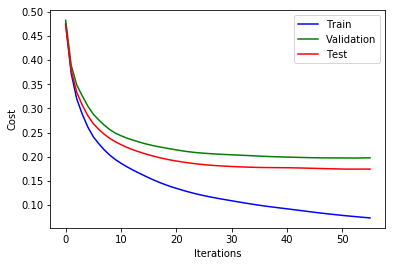

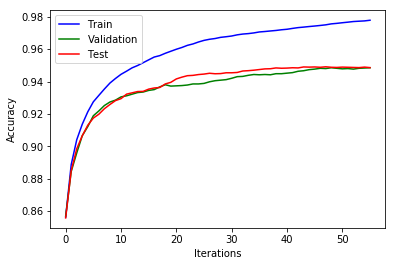

------ Running for learning rate:  0.1 -------
Current validation cost:  0.890934909449
Current validation cost:  0.669567029962
Current validation cost:  0.577883532618
Current validation cost:  0.522928889785
Current validation cost:  0.484179879966
Current validation cost:  0.455772633174
Current validation cost:  0.434002312338
Current validation cost:  0.416492234894
Current validation cost:  0.401724601641
Current validation cost:  0.388965855842
Current validation cost:  0.377895424698
Current validation cost:  0.368122220993
Current validation cost:  0.359352734602
Current validation cost:  0.351491490781
Current validation cost:  0.344447572561
Current validation cost:  0.338099498821
Current validation cost:  0.332335299783
Current validation cost:  0.327069180718
Current validation cost:  0.322238093317
Current validation cost:  0.317786038948
Current validation cost:  0.313657047474
Current validation cost:  0.309802102186
Current validation cost:  0.306181934716
Current va

Current validation cost:  0.208193210658
Current validation cost:  0.208178414118
Current validation cost:  0.208164435398
Current validation cost:  0.20815124072
Current validation cost:  0.20813879643
Current validation cost:  0.208127072643
Current validation cost:  0.208116045957
Current validation cost:  0.208105701261
Current validation cost:  0.208096032671
Current validation cost:  0.208087043644
Current validation cost:  0.208078746362
Current validation cost:  0.20807116054
Current validation cost:  0.208064311864
Current validation cost:  0.208058230284
Current validation cost:  0.208052948373
Current validation cost:  0.208048499939
Current validation cost:  0.208044918995
Current validation cost:  0.208042239189
Current validation cost:  0.20804049376
Current validation cost:  0.208039716056
Current validation cost:  0.208039940635
Current validation cost:  0.208041204875
Iteration of min weights:  219
Stopping iteration:  222
Lowest validation cost:  0.208039716056
Valida

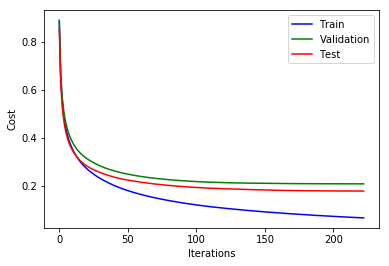

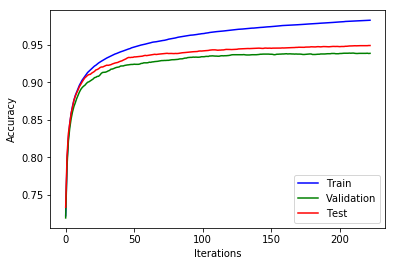

------ Running for learning rate:  0.01 -------
Current validation cost:  2.08585219461
Current validation cost:  1.7003922393
Current validation cost:  1.46994564279
Current validation cost:  1.30416988189
Current validation cost:  1.1834407333
Current validation cost:  1.09049790202
Current validation cost:  1.01497909817
Current validation cost:  0.952568789263
Current validation cost:  0.90048124814
Current validation cost:  0.856544675501
Current validation cost:  0.819017457257
Current validation cost:  0.786519202695
Current validation cost:  0.758000115608
Current validation cost:  0.732713393137
Current validation cost:  0.710123697425
Current validation cost:  0.689815608039
Current validation cost:  0.671448937471
Current validation cost:  0.654737362939
Current validation cost:  0.639439035451
Current validation cost:  0.62535556935
Current validation cost:  0.612330145013
Current validation cost:  0.600239154283
Current validation cost:  0.588981045269
Current validation c

Current validation cost:  0.285856081031
Current validation cost:  0.285497265508
Current validation cost:  0.285140747073
Current validation cost:  0.284786500153
Current validation cost:  0.284434499861
Current validation cost:  0.28408472198
Current validation cost:  0.283737142943
Current validation cost:  0.283391739815
Current validation cost:  0.283048490279
Current validation cost:  0.282707372617
Current validation cost:  0.282368365703
Current validation cost:  0.282031448982
Current validation cost:  0.281696602465
Current validation cost:  0.281363806718
Current validation cost:  0.281033042849
Current validation cost:  0.280704292506
Current validation cost:  0.280377537864
Current validation cost:  0.280052761618
Current validation cost:  0.27972994698
Current validation cost:  0.279409077668
Current validation cost:  0.279090137899
Current validation cost:  0.278773112384
Current validation cost:  0.278457986317
Current validation cost:  0.278144745366
Current validation

Current validation cost:  0.242811167003
Current validation cost:  0.242684538625
Current validation cost:  0.24255841979
Current validation cost:  0.242432806946
Current validation cost:  0.24230769655
Current validation cost:  0.242183085067
Current validation cost:  0.242058968977
Current validation cost:  0.241935344769
Current validation cost:  0.241812208951
Current validation cost:  0.241689558044
Current validation cost:  0.241567388589
Current validation cost:  0.241445697145
Current validation cost:  0.241324480293
Current validation cost:  0.241203734633
Current validation cost:  0.24108345679
Current validation cost:  0.240963643411
Current validation cost:  0.24084429117
Current validation cost:  0.240725396764
Current validation cost:  0.240606956918
Current validation cost:  0.240488968384
Current validation cost:  0.240371427943
Current validation cost:  0.240254332404
Current validation cost:  0.240137678607
Current validation cost:  0.240021463423
Current validation c

Current validation cost:  0.224505952458
Current validation cost:  0.224441539406
Current validation cost:  0.224377349222
Current validation cost:  0.224313381563
Current validation cost:  0.224249636065
Current validation cost:  0.224186112349
Current validation cost:  0.224122810017
Current validation cost:  0.224059728652
Current validation cost:  0.223996867822
Current validation cost:  0.22393422708
Current validation cost:  0.223871805959
Current validation cost:  0.223809603979
Current validation cost:  0.223747620645
Current validation cost:  0.223685855446
Current validation cost:  0.223624307857
Current validation cost:  0.223562977341
Current validation cost:  0.223501863347
Current validation cost:  0.223440965313
Current validation cost:  0.223380282663
Current validation cost:  0.223319814813
Current validation cost:  0.223259561167
Current validation cost:  0.223199521121
Current validation cost:  0.223139694061
Current validation cost:  0.223080079365
Current validatio

Current validation cost:  0.215154070313
Current validation cost:  0.215121036218
Current validation cost:  0.215088111109
Current validation cost:  0.215055295003
Current validation cost:  0.215022587916
Current validation cost:  0.214989989857
Current validation cost:  0.214957500831
Current validation cost:  0.214925120835
Current validation cost:  0.214892849861
Current validation cost:  0.214860687894
Current validation cost:  0.214828634912
Current validation cost:  0.214796690885
Current validation cost:  0.214764855776
Current validation cost:  0.214733129538
Current validation cost:  0.214701512116
Current validation cost:  0.214670003447
Current validation cost:  0.214638603456
Current validation cost:  0.214607312062
Current validation cost:  0.214576129171
Current validation cost:  0.214545054679
Current validation cost:  0.214514088472
Current validation cost:  0.214483230426
Current validation cost:  0.214452480405
Current validation cost:  0.21442183826
Current validatio

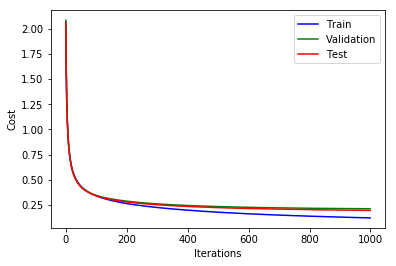

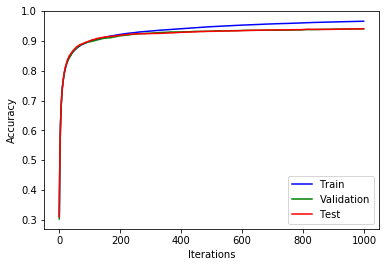

------ Running for learning rate:  0.001 -------
Current validation cost:  3.87253487342
Current validation cost:  3.16555005456
Current validation cost:  2.85092177819
Current validation cost:  2.68040247476
Current validation cost:  2.55590847837
Current validation cost:  2.45077571595
Current validation cost:  2.35983305977
Current validation cost:  2.28058410066
Current validation cost:  2.2106651025
Current validation cost:  2.14810044614
Current validation cost:  2.09142527873
Current validation cost:  2.03956740625
Current validation cost:  1.99172606741
Current validation cost:  1.94729562852
Current validation cost:  1.90581466018
Current validation cost:  1.8669257702
Current validation cost:  1.83034180109
Current validation cost:  1.79582107441
Current validation cost:  1.76315412685
Current validation cost:  1.73215915296
Current validation cost:  1.70268104543
Current validation cost:  1.67458965175
Current validation cost:  1.64777524096
Current validation cost:  1.62214

Current validation cost:  0.634315244837
Current validation cost:  0.633065333597
Current validation cost:  0.631825750977
Current validation cost:  0.630596369449
Current validation cost:  0.629377062756
Current validation cost:  0.628167705878
Current validation cost:  0.626968175013
Current validation cost:  0.625778347559
Current validation cost:  0.624598102106
Current validation cost:  0.623427318433
Current validation cost:  0.622265877506
Current validation cost:  0.621113661484
Current validation cost:  0.619970553727
Current validation cost:  0.618836438807
Current validation cost:  0.617711202519
Current validation cost:  0.616594731897
Current validation cost:  0.61548691523
Current validation cost:  0.614387642078
Current validation cost:  0.613296803291
Current validation cost:  0.612214291029
Current validation cost:  0.611139998778
Current validation cost:  0.610073821372
Current validation cost:  0.609015655016
Current validation cost:  0.607965397299
Current validatio

Current validation cost:  0.493139875622
Current validation cost:  0.492728602631
Current validation cost:  0.492318840995
Current validation cost:  0.491910580663
Current validation cost:  0.491503811697
Current validation cost:  0.491098524265
Current validation cost:  0.490694708644
Current validation cost:  0.490292355219
Current validation cost:  0.489891454478
Current validation cost:  0.489491997011
Current validation cost:  0.489093973513
Current validation cost:  0.488697374776
Current validation cost:  0.488302191696
Current validation cost:  0.487908415261
Current validation cost:  0.487516036559
Current validation cost:  0.487125046771
Current validation cost:  0.486735437173
Current validation cost:  0.48634719913
Current validation cost:  0.485960324101
Current validation cost:  0.485574803631
Current validation cost:  0.485190629355
Current validation cost:  0.484807792993
Current validation cost:  0.484426286351
Current validation cost:  0.484046101317
Current validatio

Current validation cost:  0.431975462854
Current validation cost:  0.431748759679
Current validation cost:  0.431522614944
Current validation cost:  0.431297026367
Current validation cost:  0.431071991677
Current validation cost:  0.430847508608
Current validation cost:  0.430623574904
Current validation cost:  0.430400188319
Current validation cost:  0.430177346611
Current validation cost:  0.429955047551
Current validation cost:  0.429733288913
Current validation cost:  0.429512068484
Current validation cost:  0.429291384056
Current validation cost:  0.42907123343
Current validation cost:  0.428851614417
Current validation cost:  0.428632524834
Current validation cost:  0.428413962507
Current validation cost:  0.428195925271
Current validation cost:  0.42797841097
Current validation cost:  0.427761417454
Current validation cost:  0.427544942584
Current validation cost:  0.427328984229
Current validation cost:  0.427113540265
Current validation cost:  0.426898608578
Current validation

Current validation cost:  0.39517632005
Current validation cost:  0.39502760658
Current validation cost:  0.394879158859
Current validation cost:  0.394730976037
Current validation cost:  0.39458305727
Current validation cost:  0.394435401717
Current validation cost:  0.39428800854
Current validation cost:  0.394140876907
Current validation cost:  0.393994005985
Current validation cost:  0.39384739495
Current validation cost:  0.393701042977
Current validation cost:  0.393554949247
Current validation cost:  0.393409112945
Current validation cost:  0.393263533258
Current validation cost:  0.393118209376
Current validation cost:  0.392973140494
Current validation cost:  0.392828325809
Current validation cost:  0.392683764523
Current validation cost:  0.392539455839
Current validation cost:  0.392395398965
Current validation cost:  0.392251593112
Current validation cost:  0.392108037493
Current validation cost:  0.391964731326
Current validation cost:  0.391821673832
Current validation co

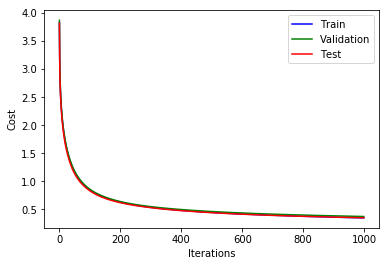

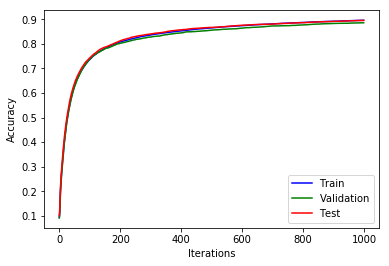

------ Running for learning rate:  0.0001 -------
Current validation cost:  6.54780787547
Current validation cost:  6.04322128743
Current validation cost:  5.61539947135
Current validation cost:  5.2426773232
Current validation cost:  4.9143417354
Current validation cost:  4.62479725382
Current validation cost:  4.37024441641
Current validation cost:  4.14716441518
Current validation cost:  3.95190932286
Current validation cost:  3.78080480045
Current validation cost:  3.63037590349
Current validation cost:  3.49753332568
Current validation cost:  3.37966660401
Current validation cost:  3.27464237952
Current validation cost:  3.18074361793
Current validation cost:  3.09659035041
Current validation cost:  3.02106474897
Current validation cost:  2.95324760627
Current validation cost:  2.89236677232
Current validation cost:  2.83775667483
Current validation cost:  2.78882780603
Current validation cost:  2.74504486077
Current validation cost:  2.70591206737
Current validation cost:  2.6709

Current validation cost:  1.69181267616
Current validation cost:  1.68949352815
Current validation cost:  1.68718387468
Current validation cost:  1.68488362464
Current validation cost:  1.68259268903
Current validation cost:  1.68031098094
Current validation cost:  1.67803841543
Current validation cost:  1.67577490946
Current validation cost:  1.67352038178
Current validation cost:  1.67127475292
Current validation cost:  1.66903794502
Current validation cost:  1.66680988182
Current validation cost:  1.66459048857
Current validation cost:  1.66237969196
Current validation cost:  1.66017742005
Current validation cost:  1.65798360222
Current validation cost:  1.65579816909
Current validation cost:  1.65362105249
Current validation cost:  1.65145218541
Current validation cost:  1.64929150193
Current validation cost:  1.6471389372
Current validation cost:  1.64499442739
Current validation cost:  1.64285790965
Current validation cost:  1.64072932208
Current validation cost:  1.63860860373
C

Current validation cost:  1.34570944323
Current validation cost:  1.34447283028
Current validation cost:  1.34323917873
Current validation cost:  1.34200847622
Current validation cost:  1.34078071056
Current validation cost:  1.33955586971
Current validation cost:  1.33833394176
Current validation cost:  1.33711491496
Current validation cost:  1.3358987777
Current validation cost:  1.33468551849
Current validation cost:  1.33347512601
Current validation cost:  1.33226758905
Current validation cost:  1.33106289654
Current validation cost:  1.32986103755
Current validation cost:  1.32866200125
Current validation cost:  1.32746577696
Current validation cost:  1.32627235412
Current validation cost:  1.32508172227
Current validation cost:  1.3238938711
Current validation cost:  1.32270879037
Current validation cost:  1.32152647001
Current validation cost:  1.3203469
Current validation cost:  1.31917007046
Current validation cost:  1.31799597161
Current validation cost:  1.31682459378
Curren

Current validation cost:  1.14141355721
Current validation cost:  1.14062271166
Current validation cost:  1.13983342489
Current validation cost:  1.13904569217
Current validation cost:  1.13825950878
Current validation cost:  1.13747487001
Current validation cost:  1.13669177119
Current validation cost:  1.13591020766
Current validation cost:  1.13513017476
Current validation cost:  1.13435166786
Current validation cost:  1.13357468236
Current validation cost:  1.13279921366
Current validation cost:  1.13202525719
Current validation cost:  1.13125280838
Current validation cost:  1.13048186271
Current validation cost:  1.12971241565
Current validation cost:  1.12894446271
Current validation cost:  1.1281779994
Current validation cost:  1.12741302125
Current validation cost:  1.12664952384
Current validation cost:  1.12588750272
Current validation cost:  1.1251269535
Current validation cost:  1.12436787179
Current validation cost:  1.12361025322
Current validation cost:  1.12285409344
Cu

Current validation cost:  1.00595451032
Current validation cost:  1.00541016579
Current validation cost:  1.00486674411
Current validation cost:  1.00432424311
Current validation cost:  1.00378266058
Current validation cost:  1.00324199435
Current validation cost:  1.00270224223
Current validation cost:  1.00216340203
Current validation cost:  1.00162547159
Current validation cost:  1.00108844872
Current validation cost:  1.00055233126
Current validation cost:  1.00001711703
Current validation cost:  0.999482803879
Current validation cost:  0.998949389632
Current validation cost:  0.998416872134
Current validation cost:  0.997885249228
Current validation cost:  0.99735451876
Current validation cost:  0.996824678581
Current validation cost:  0.996295726543
Current validation cost:  0.995767660503
Current validation cost:  0.99524047832
Current validation cost:  0.994714177859
Current validation cost:  0.994188756984
Current validation cost:  0.993664213567
Current validation cost:  0.99

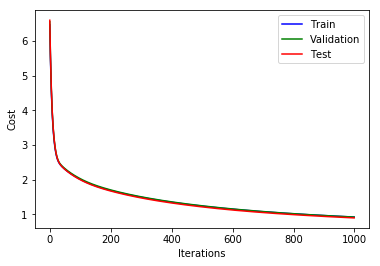

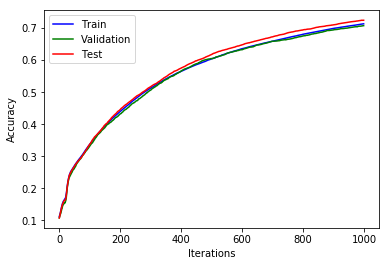

In [64]:
for lR in learningRates:
    #initializing weights
    W1 = np.random.uniform(low=-1.0, high=1.0, size=(785, 64))
    W2 = np.random.uniform(low=-1.0, high=1.0, size=(65, 10))
    
    #variables for recording min error state of the model
    prevValCost = float('inf')
    minValCost = float('inf')
    valAccAtMinCost = 0.0
    W1MinCost = np.zeros(shape=(785, 64))
    W2MinCost = np.zeros(shape=(65, 10))
    stopConditionCount = 0
    epochAtMinWeight = 0
    stoppingIteration = 0
    
    #variables to track the error and accuracy as model is trained
    testCost = []
    valCost = []
    trainCost = []
    testAcc = []
    valAcc = []
    trainAcc = []
    
    print("------ Running for learning rate: ",lR,"-------")
    
    for epoch in range(maxIters):
        for b in range(batches):
            x = trainImages[b*batch_size:(b+1)*batch_size]
            t = t_train[b*batch_size:(b+1)*batch_size]
            
            #forward propagation
            A1 = x.dot(W1)
            Z1 = sigmoid(A1)
            X2 = np.insert(Z1, 0, 1, axis=1)
            A2 = X2.dot(W2)
            Y = softmax(A2)

            # Backward propagation
            W2_nobias = np.delete(W2, (0), axis=0)
            summation_k = (Y-t).dot(W2_nobias.T)
            g_derivative = Z1*(1-Z1)
            delE_Wij = x.T.dot(np.multiply(summation_k, g_derivative))
            delE_Wij = delE_Wij
            
            #weight update
            W2 = W2-(lR/len(x))*((X2.T.dot(Y-t)))
            W1 = W1-(lR/len(x))*(delE_Wij)

        # Calculating error and accuracy w.r.t updated weights after one iteration through the complete dataset
        y_train = calculateOutput1Layer(x=trainImages, W1=W1, W2=W2)
        currTrainCost = calculateCost(xLen=len(trainImages), t=t_train, Y=y_train)
        currTrainAcc = calculateAccuracy(Y=y_train, labels=trainLabels)
        trainCost.append(currTrainCost)
        trainAcc.append(currTrainAcc)
        
        y_val = calculateOutput1Layer(x=validImages, W1=W1, W2=W2)
        currValCost = calculateCost(xLen=len(validImages), t=t_validation, Y=y_val)
        currValAcc = calculateAccuracy(Y=y_val, labels=validLabels)
        valCost.append(currValCost)
        valAcc.append(currValAcc)
        
        y_test = calculateOutput1Layer(x=testImages, W1=W1, W2=W2)
        currTestCost = calculateCost(xLen=len(testImages), t=t_test, Y=y_test)
        currTestAcc = calculateAccuracy(Y=y_test, labels=testLabels)
        testCost.append(currTestCost)
        testAcc.append(currTestAcc)
        
        if (currValCost < minValCost):
            W1MinCost = W1
            W2MinCost = W2
            epochAtMinWeight = epoch
            minValCost = currValCost
            valAccAtMinCost = currValAcc

        # Early stopping
        if (currValCost > prevValCost):
                stopConditionCount += 1
                if (stopConditionCount >= 3):
                    stoppingIteration = epoch
                    break
        else:
            stopConditionCount = 0
        prevValCost = currValCost
        
#         print("Current training error = ", currTrainingError)
        print("Current validation cost: ", currValCost)
#         print("Current training accuracy = ", currTrainingAccuracy)
#         print("Current validation accuracy = ", currValidationAccuracy)
#         print("Current test accuracy = ", currTestAccuracy)

    print("Iteration of min weights: ", epochAtMinWeight)
    print("Stopping iteration: ", stoppingIteration)
    print("Lowest validation cost: ", minValCost)
    print("Validation Accuracy at lowest validation cost: ", valAccAtMinCost)
    
    plt.plot(trainCost, label="Train", color='blue')
    plt.plot(valCost, label="Validation", color='green')
    plt.plot(testCost, label="Test", color='red')
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.legend()
    plt.show()

    plt.plot(trainAcc, label="Train", color='blue')
    plt.plot(valAcc, label="Validation", color='green')
    plt.plot(testAcc, label="Test", color='red')
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.legend()
    plt.show()

In [99]:
epsilon = 0.001
batch_size = 128
batches = len(trainImages)//batch_size
learningRates = [0.0001, 0.0015, 0.1, 0.01, 0.015, 0.2, 0.001]#, 0.1, 0.01, 0.001, 0.0001] #[0.8, 0.5, 0.1]#, 0.01]
maxIters = 5000

------ Running for learning rate:  0.0001 -------
Iteration of min weights:  4999
Stopping iteration:  0
Lowest validation cost:  0.87122291319
Validation Accuracy at lowest validation cost:  0.7175


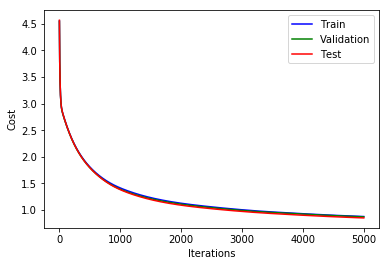

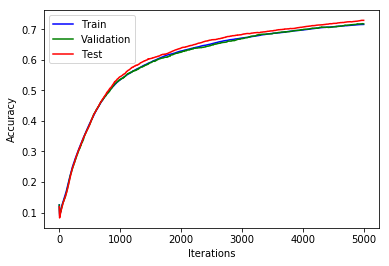

------ Running for learning rate:  0.0015 -------
Iteration of min weights:  1358
Stopping iteration:  1368
Lowest validation cost:  0.710597549865
Validation Accuracy at lowest validation cost:  0.775


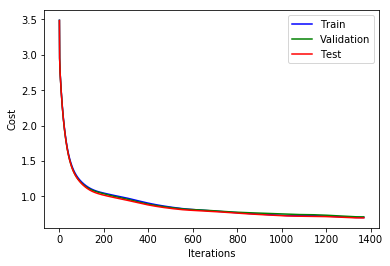

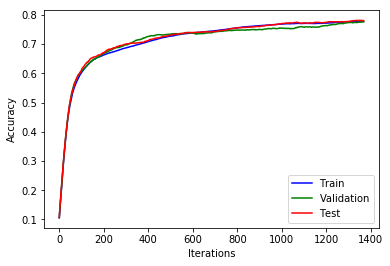

------ Running for learning rate:  0.1 -------
Iteration of min weights:  33
Stopping iteration:  159
Lowest validation cost:  0.676888074275
Validation Accuracy at lowest validation cost:  0.782


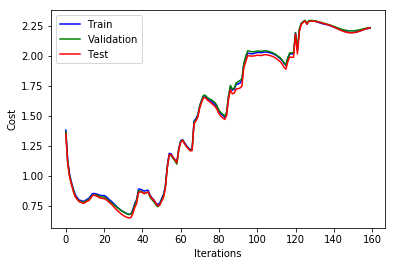

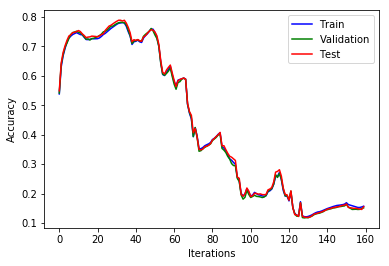

------ Running for learning rate:  0.01 -------
Iteration of min weights:  180
Stopping iteration:  190
Lowest validation cost:  0.687507942321
Validation Accuracy at lowest validation cost:  0.786166666667


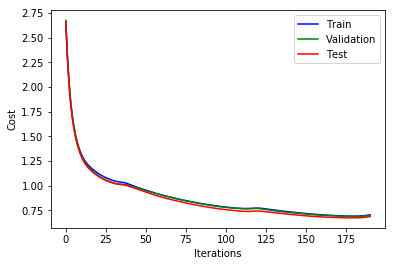

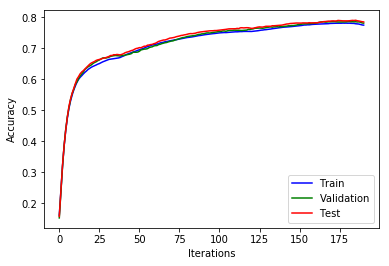

------ Running for learning rate:  0.015 -------
Iteration of min weights:  21
Stopping iteration:  31
Lowest validation cost:  1.00636264403
Validation Accuracy at lowest validation cost:  0.679833333333


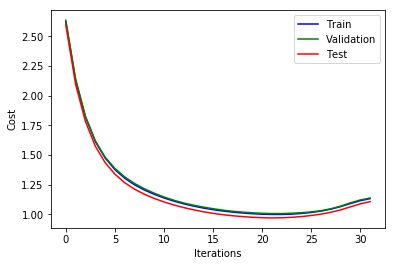

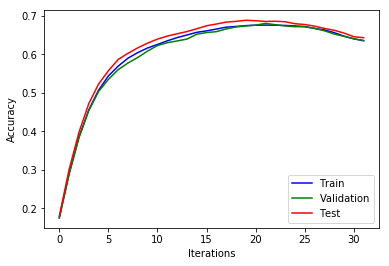

------ Running for learning rate:  0.2 -------
Iteration of min weights:  12
Stopping iteration:  110
Lowest validation cost:  0.531492328373
Validation Accuracy at lowest validation cost:  0.833166666667


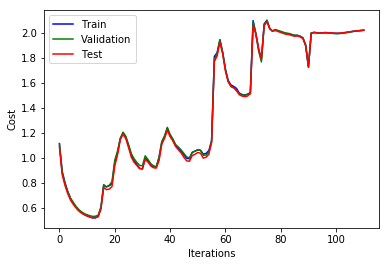

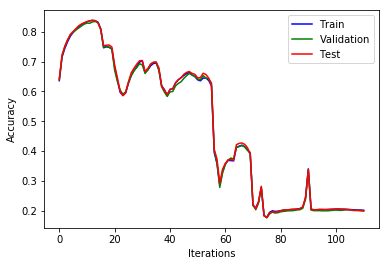

------ Running for learning rate:  0.001 -------
Iteration of min weights:  980
Stopping iteration:  990
Lowest validation cost:  0.771556269076
Validation Accuracy at lowest validation cost:  0.749833333333


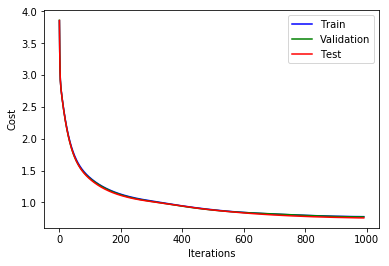

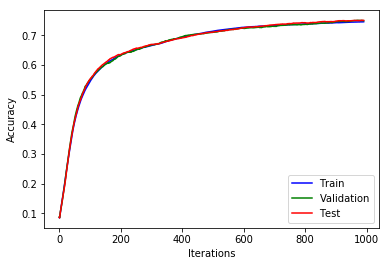

In [100]:
for lR in learningRates:
    #initializing weights
    W1 = np.random.uniform(low=-1.0, high=1.0, size=(785, 64))
    W2 = np.random.uniform(low=-1.0, high=1.0, size=(65, 64))
    W3 = np.random.uniform(low=-1.0, high=1.0, size=(65, 10))
    
    #variables for recording min error state of the model
    prevValCost = float('inf')
    minValCost = float('inf')
    valAccAtMinCost = 0.0
    W1MinCost = np.zeros(shape=(785, 64))
    W2MinCost = np.zeros(shape=(65, 10))
    stopConditionCount = 0
    epochAtMinWeight = 0
    stoppingIteration = 0
    
    #variables to track the error and accuracy as model is trained
    testCost = []
    valCost = []
    trainCost = []
    testAcc = []
    valAcc = []
    trainAcc = []
    
    print("------ Running for learning rate: ",lR,"-------")
    
    for epoch in range(maxIters):
        for b in range(batches):
            x = trainImages[b*batch_size:(b+1)*batch_size]
            t = t_train[b*batch_size:(b+1)*batch_size]
            
            #forward propagation
            
            A1 = x.dot(W1)
            Z1 = sigmoid(A1)
            X2 = np.insert(Z1, 0, 1, axis=1)
            A2 = X2.dot(W2)
            Z2 = sigmoid(A1)
            X3 = np.insert(Z2, 0, 1, axis=1)
            A3 = X3.dot(W3)
            Y = softmax(A3)
            
#             print(A1.shape)
#             print(Z1.shape)
#             print(X2.shape)
#             print(A2.shape)
#             print(Z2.shape)
#             print(X3.shape)
#             print(A3.shape)
#             print(Y.shape)

            # Backward propagation
            W3_nobias = np.delete(W3, (0), axis=0)
            summation_l = (Y-t).dot(W3_nobias.T)
            g_derivative = Z2*(1-Z2)
            delE_ak = np.multiply(summation_l, g_derivative);
            delE_Wjk = X2.T.dot(delE_ak)
            W2_nobias = np.delete(W2, (0), axis=0)
            summation_k = np.matmul(delE_ak, W2_nobias)
            g2_derivative = Z1*(1-Z1)
            delE_aj = np.multiply(summation_k, g2_derivative)
            delE_Wij = x.T.dot(delE_aj)
            
            #weight update
            W3 =  W3-(lR/len(x))*((X3.T.dot(Y-t)))
            W2 = W2-(lR/len(x))*(delE_Wjk)
            W1 = W1-(lR/len(x))*(delE_Wij)

        # Calculating error and accuracy w.r.t updated weights after one iteration through the complete dataset
        y_train = calculateOutput2Layers(x=trainImages, W1=W1, W2=W2, W3=W3)
        currTrainCost = calculateCost(xLen=len(trainImages), t=t_train, Y=y_train)
        currTrainAcc = calculateAccuracy(Y=y_train, labels=trainLabels)
        trainCost.append(currTrainCost)
        trainAcc.append(currTrainAcc)
        
        y_val = calculateOutput2Layers(x=validImages, W1=W1, W2=W2, W3=W3)
        currValCost = calculateCost(xLen=len(validImages), t=t_validation, Y=y_val)
        currValAcc = calculateAccuracy(Y=y_val, labels=validLabels)
        valCost.append(currValCost)
        valAcc.append(currValAcc)
        
        y_test = calculateOutput2Layers(x=testImages, W1=W1, W2=W2, W3=W3)
        currTestCost = calculateCost(xLen=len(testImages), t=t_test, Y=y_test)
        currTestAcc = calculateAccuracy(Y=y_test, labels=testLabels)
        testCost.append(currTestCost)
        testAcc.append(currTestAcc)
        
        if (currValCost < minValCost):
            W1MinCost = W1
            W2MinCost = W2
            epochAtMinWeight = epoch
            minValCost = currValCost
            valAccAtMinCost = currValAcc

        # Early stopping
        if (currValCost > prevValCost):
                stopConditionCount += 1
                if (stopConditionCount >= 10):
                    stoppingIteration = epoch
                    break
        else:
            stopConditionCount = 0
        prevValCost = currValCost
        
#         print("Current training error = ", currTrainingError)
#         print("Current validation cost: ", currValCost)
#         print("Current training accuracy = ", currTrainingAccuracy)
#         print("Current validation accuracy = ", currValidationAccuracy)
#         print("Current test accuracy = ", currTestAccuracy)

    print("Iteration of min weights: ", epochAtMinWeight)
    print("Stopping iteration: ", stoppingIteration)
    print("Lowest validation cost: ", minValCost)
    print("Validation Accuracy at lowest validation cost: ", valAccAtMinCost)
    
    plt.plot(trainCost, label="Train", color='blue')
    plt.plot(valCost, label="Validation", color='green')
    plt.plot(testCost, label="Test", color='red')
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.legend()
    plt.show()

    plt.plot(trainAcc, label="Train", color='blue')
    plt.plot(valAcc, label="Validation", color='green')
    plt.plot(testAcc, label="Test", color='red')
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.legend()
    plt.show()